# Import Dependencies

In [2]:
import math, random, re
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt

# Word Clouds

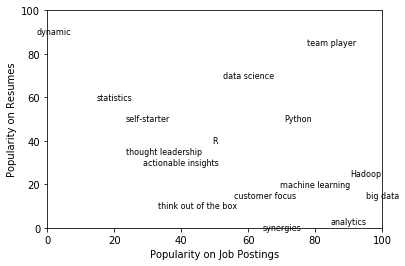

In [3]:
def plot_resumes(plt):
    data = [ ("big data", 100, 15), ("Hadoop", 95, 25), ("Python", 75, 50),
         ("R", 50, 40), ("machine learning", 80, 20), ("statistics", 20, 60),
         ("data science", 60, 70), ("analytics", 90, 3),
         ("team player", 85, 85), ("dynamic", 2, 90), ("synergies", 70, 0),
         ("actionable insights", 40, 30), ("think out of the box", 45, 10),
         ("self-starter", 30, 50), ("customer focus", 65, 15),
         ("thought leadership", 35, 35)]

    def text_size(total):
        """equals 8 if total is 0, 28 if total is 200"""
        return 8 + total / 200 * 20

    for word, job_popularity, resume_popularity in data:
        plt.text(job_popularity, resume_popularity, word,
                 ha='center', va='center',
                 size=text_size(job_popularity + resume_popularity))
    plt.xlabel("Popularity on Job Postings")
    plt.ylabel("Popularity on Resumes")
    plt.axis([0, 100, 0, 100])
    plt.show()
    
plot_resumes(plt)

# n-gram Models

In [4]:
#
# n-gram models
#

def fix_unicode(text):
    return text.replace(u"\u2019", "'")

def get_document():

    url = "http://radar.oreilly.com/2010/06/what-is-data-science.html"
    html = requests.get(url).text
    soup = BeautifulSoup(html, 'html5lib')

    content = soup.find("div", "article-body")         # find article-body div
    regex = r"[\w']+|[\.]"                             # matches a word or a period

    document = []


    for paragraph in content("p"):
        words = re.findall(regex, fix_unicode(paragraph.text))
        document.extend(words)

    return document

def generate_using_bigrams(transitions):
    current = "."   # this means the next word will start a sentence
    result = []
    while True:
        next_word_candidates = transitions[current]    # bigrams (current, _)
        current = random.choice(next_word_candidates)  # choose one at random
        result.append(current)                         # append it to results
        if current == ".": return " ".join(result)     # if "." we're done

def generate_using_trigrams(starts, trigram_transitions):
    current = random.choice(starts)   # choose a random starting word
    prev = "."                        # and precede it with a '.'
    result = [current]
    while True:
        next_word_candidates = trigram_transitions[(prev, current)]
        next = random.choice(next_word_candidates)

        prev, current = current, next
        result.append(current)

        if current == ".":
            return " ".join(result)

def is_terminal(token):
    return token[0] != "_"

def expand(grammar, tokens):
    for i, token in enumerate(tokens):

        # ignore terminals
        if is_terminal(token): continue

        # choose a replacement at random
        replacement = random.choice(grammar[token])

        if is_terminal(replacement):
            tokens[i] = replacement
        else:
            tokens = tokens[:i] + replacement.split() + tokens[(i+1):]
        return expand(grammar, tokens)

    # if we get here we had all terminals and are done
    return tokens

def generate_sentence(grammar):
    return expand(grammar, ["_S"])

In [6]:
document = get_document()

In [9]:
# bigrams
bigrams = list(zip(document, document[1:]))
transitions = defaultdict(list)
for prev, current in bigrams:
    transitions[prev].append(current)

random.seed(0)
print("bigram sentences")
for i in range(10):
    print(i, generate_using_bigrams(transitions))
print()



bigram sentences
(0, u'Scientists also frequently missing do you can involve video is a high level dataflow language understanding how to looking for traditional statistics work .')
(1, u'92 percent .')
(2, u'ly are inherently interdiscplinary .')
(3, u"We don't have a foundational text for most of these databases are we now terabyte drives in Beautiful Data conditioning or getting humans or some hints at what Patil described the application with Apple industry .")
(4, u"But we've seen much of known data products .")
(5, u'The ability to come up with the aesthetics of presenting results of huge mountain of a basic skill in not in enabling agile practices are extremely large snakes .')
(6, u"And that gave them are many sides of data centric industries have to classify them open source R analyzes mortgage foreclosures in R was an audio and more traditional techniques for R language understanding of the customers' behavior the trick was an agile data analysis over time MapReduce make that

In [10]:
# trigrams

trigrams = list(zip(document, document[1:], document[2:]))
trigram_transitions = defaultdict(list)
starts = []

for prev, current, next in trigrams:

    if prev == ".":              # if the previous "word" was a period
        starts.append(current)   # then this is a start word

    trigram_transitions[(prev, current)].append(next)

print("trigram sentences")
for i in range(10):
    print(i, generate_using_trigrams(starts, trigram_transitions))
print()

trigram sentences
(0, u'Hadoop processes data as a data platform .')
(1, u'It was an agile flexible process that built toward its goal incrementally rather than for traditional analysis and use data .')
(2, u'To do data conditioning if you understand what correlation means .')
(3, u'93 percent .')
(4, u'While rock solid consistency is crucial to each stage of the toolbox .')
(5, u"Here's a few examples Google isn't the only company that knows how to use anything from ancient Unix utilities such as awk to XML parsers and machine learning .")
(6, u'What differentiates data science .')
(7, u'1 The NASA article denies this but also says that when she gets a new breed of databases appear .')
(8, u"What differentiates data science what you think it's telling .")
(9, u'Data is everywhere your government your web server your business partners even your body .')
()


# Grammars

In [11]:
grammar = {
    "_S"  : ["_NP _VP"],
    "_NP" : ["_N",
             "_A _NP _P _A _N"],
    "_VP" : ["_V",
             "_V _NP"],
    "_N"  : ["data science", "Python", "regression"],
    "_A"  : ["big", "linear", "logistic"],
    "_P"  : ["about", "near"],
    "_V"  : ["learns", "trains", "tests", "is"]
}

print("grammar sentences")
for i in range(10):
    print(i, " ".join(generate_sentence(grammar)))
print()

grammar sentences
(0, 'logistic logistic Python near logistic Python near linear Python is big Python about big regression')
(1, 'Python learns big regression about big Python')
(2, 'logistic big linear linear Python about big Python near big Python about linear regression about logistic Python tests')
(3, 'regression is regression')
(4, 'logistic logistic logistic regression about logistic Python near big data science near linear regression tests big regression near logistic regression')
(5, 'data science tests')
(6, 'linear regression near big Python learns logistic big Python about linear data science near logistic data science')
(7, 'data science is data science')
(8, 'Python learns Python')
(9, 'regression trains')
()


# An Aside: Gibbs Sampling

In [12]:
#
# Gibbs Sampling
#

def roll_a_die():
    return random.choice([1,2,3,4,5,6])

def direct_sample():
    d1 = roll_a_die()
    d2 = roll_a_die()
    return d1, d1 + d2

def random_y_given_x(x):
    """equally likely to be x + 1, x + 2, ... , x + 6"""
    return x + roll_a_die()

def random_x_given_y(y):
    if y <= 7:
        # if the total is 7 or less, the first die is equally likely to be
        # 1, 2, ..., (total - 1)
        return random.randrange(1, y)
    else:
        # if the total is 7 or more, the first die is equally likely to be
        # (total - 6), (total - 5), ..., 6
        return random.randrange(y - 6, 7)

def gibbs_sample(num_iters=100):
    x, y = 1, 2 # doesn't really matter
    for _ in range(num_iters):
        x = random_x_given_y(y)
        y = random_y_given_x(x)
    return x, y

def compare_distributions(num_samples=1000):
    counts = defaultdict(lambda: [0, 0])
    for _ in range(num_samples):
        counts[gibbs_sample()][0] += 1
        counts[direct_sample()][1] += 1
    return counts


In [78]:
comparison = compare_distributions()

In [79]:
comparison.items()

[((5, 9), [36, 29]),
 ((6, 9), [27, 28]),
 ((1, 3), [20, 22]),
 ((4, 8), [29, 16]),
 ((5, 6), [23, 20]),
 ((2, 8), [29, 30]),
 ((4, 7), [28, 27]),
 ((1, 6), [28, 27]),
 ((3, 7), [26, 32]),
 ((2, 5), [38, 22]),
 ((5, 8), [35, 25]),
 ((1, 2), [31, 29]),
 ((6, 7), [23, 27]),
 ((1, 5), [29, 18]),
 ((6, 10), [26, 31]),
 ((4, 5), [31, 32]),
 ((3, 6), [28, 24]),
 ((4, 9), [30, 21]),
 ((4, 10), [35, 33]),
 ((2, 6), [26, 39]),
 ((5, 11), [31, 30]),
 ((6, 11), [32, 34]),
 ((1, 4), [30, 26]),
 ((3, 9), [34, 25]),
 ((2, 3), [22, 33]),
 ((6, 8), [24, 30]),
 ((6, 12), [23, 33]),
 ((3, 5), [17, 27]),
 ((2, 7), [23, 29]),
 ((5, 10), [30, 25]),
 ((4, 6), [21, 37]),
 ((5, 7), [25, 28]),
 ((3, 8), [26, 27]),
 ((1, 7), [34, 27]),
 ((3, 4), [31, 33]),
 ((2, 4), [19, 24])]

In [13]:
print("gibbs sampling")
comparison = compare_distributions()
for roll, (gibbs, direct) in comparison.items():
    print(roll, gibbs, direct)


gibbs sampling
((5, 9), 23, 31)
((4, 7), 24, 34)
((1, 3), 32, 26)
((4, 8), 23, 23)
((5, 6), 25, 25)
((2, 8), 30, 22)
((6, 9), 35, 33)
((1, 6), 30, 32)
((6, 12), 25, 19)
((3, 7), 33, 28)
((2, 5), 27, 21)
((5, 8), 22, 35)
((1, 2), 32, 20)
((6, 7), 26, 21)
((6, 10), 21, 23)
((1, 5), 40, 26)
((3, 6), 37, 23)
((3, 5), 30, 33)
((4, 10), 32, 32)
((2, 6), 22, 28)
((5, 11), 24, 23)
((4, 5), 34, 33)
((6, 11), 33, 25)
((1, 4), 21, 26)
((3, 9), 27, 19)
((2, 3), 28, 26)
((4, 9), 18, 27)
((4, 6), 28, 36)
((2, 7), 28, 39)
((5, 10), 26, 36)
((6, 8), 29, 34)
((5, 7), 23, 20)
((3, 8), 28, 31)
((1, 7), 31, 36)
((3, 4), 25, 27)
((2, 4), 28, 27)


# Topic Modeling

In [18]:
#
# TOPIC MODELING
#

def sample_from(weights):
    total = sum(weights)
    rnd = total * random.random()       # uniform between 0 and total
    for i, w in enumerate(weights):
        rnd -= w                        # return the smallest i such that
        if rnd <= 0: return i           # sum(weights[:(i+1)]) >= rnd

In [19]:
documents = [
    ["Hadoop", "Big Data", "HBase", "Java", "Spark", "Storm", "Cassandra"],
    ["NoSQL", "MongoDB", "Cassandra", "HBase", "Postgres"],
    ["Python", "scikit-learn", "scipy", "numpy", "statsmodels", "pandas"],
    ["R", "Python", "statistics", "regression", "probability"],
    ["machine learning", "regression", "decision trees", "libsvm"],
    ["Python", "R", "Java", "C++", "Haskell", "programming languages"],
    ["statistics", "probability", "mathematics", "theory"],
    ["machine learning", "scikit-learn", "Mahout", "neural networks"],
    ["neural networks", "deep learning", "Big Data", "artificial intelligence"],
    ["Hadoop", "Java", "MapReduce", "Big Data"],
    ["statistics", "R", "statsmodels"],
    ["C++", "deep learning", "artificial intelligence", "probability"],
    ["pandas", "R", "Python"],
    ["databases", "HBase", "Postgres", "MySQL", "MongoDB"],
    ["libsvm", "regression", "support vector machines"]
]

K = 4

document_topic_counts = [Counter()
                         for _ in documents]

In [82]:
documents[3][3]

'regression'

In [20]:
document_topic_counts

[Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter(),
 Counter()]

In [21]:
topic_word_counts = [Counter() for _ in range(K)]

In [22]:
topic_word_counts

[Counter(), Counter(), Counter(), Counter()]

In [23]:
topic_counts = [0 for _ in range(K)]

In [24]:
topic_counts

[0, 0, 0, 0]

In [25]:
document_lengths = [len(d) for d in documents]

In [26]:
document_lengths

[7, 5, 6, 5, 4, 6, 4, 4, 4, 4, 3, 4, 3, 5, 3]

In [27]:
distinct_words = set(word for document in documents for word in document)

In [28]:
distinct_words

{'Big Data',
 'C++',
 'Cassandra',
 'HBase',
 'Hadoop',
 'Haskell',
 'Java',
 'Mahout',
 'MapReduce',
 'MongoDB',
 'MySQL',
 'NoSQL',
 'Postgres',
 'Python',
 'R',
 'Spark',
 'Storm',
 'artificial intelligence',
 'databases',
 'decision trees',
 'deep learning',
 'libsvm',
 'machine learning',
 'mathematics',
 'neural networks',
 'numpy',
 'pandas',
 'probability',
 'programming languages',
 'regression',
 'scikit-learn',
 'scipy',
 'statistics',
 'statsmodels',
 'support vector machines',
 'theory'}

In [29]:
W = len(distinct_words)

D = len(documents)

In [30]:
W

36

In [31]:
D

15

In [32]:
def p_topic_given_document(topic, d, alpha=0.1):
    """the fraction of words in document _d_
    that are assigned to _topic_ (plus some smoothing)"""

    return ((document_topic_counts[d][topic] + alpha) /
            (document_lengths[d] + K * alpha))

def p_word_given_topic(word, topic, beta=0.1):
    """the fraction of words assigned to _topic_
    that equal _word_ (plus some smoothing)"""

    return ((topic_word_counts[topic][word] + beta) /
            (topic_counts[topic] + W * beta))

def topic_weight(d, word, k):
    """given a document and a word in that document,
    return the weight for the k-th topic"""

    return p_word_given_topic(word, k) * p_topic_given_document(k, d)

def choose_new_topic(d, word):
    return sample_from([topic_weight(d, word, k)
                        for k in range(K)])

In [33]:
random.seed(0)
document_topics = [[random.randrange(K) for word in document]
                   for document in documents]

In [86]:
document_topics

[[0, 0, 2, 0, 2, 0, 2],
 [2, 2, 2, 2, 2],
 [1, 3, 1, 1, 1, 1],
 [1, 1, 1, 3, 1],
 [3, 3, 3, 3],
 [3, 1, 0, 0, 0, 0],
 [1, 1, 1, 1],
 [3, 3, 3, 3],
 [0, 0, 0, 0],
 [0, 0, 0, 0],
 [1, 1, 1],
 [0, 0, 0, 3],
 [1, 1, 1],
 [3, 2, 2, 2, 2],
 [3, 3, 3]]

In [35]:
for d in range(D):
    for word, topic in zip(documents[d], document_topics[d]):
        document_topic_counts[d][topic] += 1
        topic_word_counts[topic][word] += 1
        topic_counts[topic] += 1

In [36]:
document_topic_counts

[Counter({1: 3, 2: 1, 3: 3}),
 Counter({1: 2, 2: 2, 3: 1}),
 Counter({1: 2, 2: 1, 3: 3}),
 Counter({1: 1, 2: 1, 3: 3}),
 Counter({0: 1, 1: 2, 2: 1}),
 Counter({1: 2, 2: 1, 3: 3}),
 Counter({0: 1, 2: 2, 3: 1}),
 Counter({0: 1, 1: 1, 2: 1, 3: 1}),
 Counter({0: 1, 1: 2, 3: 1}),
 Counter({0: 2, 2: 1, 3: 1}),
 Counter({1: 1, 3: 2}),
 Counter({0: 1, 1: 1, 2: 1, 3: 1}),
 Counter({0: 1, 2: 2}),
 Counter({2: 3, 3: 2}),
 Counter({1: 1, 2: 2})]

In [37]:
topic_word_counts

[Counter({'Big Data': 2,
          'C++': 1,
          'Java': 1,
          'decision trees': 1,
          'mathematics': 1,
          'neural networks': 1,
          'pandas': 1}),
 Counter({'C++': 1,
          'HBase': 1,
          'Java': 1,
          'MongoDB': 1,
          'NoSQL': 1,
          'Python': 1,
          'Storm': 1,
          'artificial intelligence': 1,
          'deep learning': 1,
          'libsvm': 1,
          'machine learning': 1,
          'neural networks': 1,
          'numpy': 1,
          'programming languages': 1,
          'regression': 2,
          'statistics': 1,
          'statsmodels': 1}),
 Counter({'Cassandra': 1,
          'Mahout': 1,
          'MapReduce': 1,
          'MongoDB': 1,
          'Postgres': 2,
          'Python': 2,
          'R': 1,
          'Spark': 1,
          'artificial intelligence': 1,
          'databases': 1,
          'libsvm': 1,
          'machine learning': 1,
          'probability': 1,
          'regression': 1

In [38]:
topic_counts

[8, 18, 19, 22]

In [39]:
for iter in range(1000):
    for d in range(D):
        for i, (word, topic) in enumerate(zip(documents[d],
                                              document_topics[d])):

            # remove this word / topic from the counts
            # so that it doesn't influence the weights
            document_topic_counts[d][topic] -= 1
            topic_word_counts[topic][word] -= 1
            topic_counts[topic] -= 1
            document_lengths[d] -= 1

            # choose a new topic based on the weights
            new_topic = choose_new_topic(d, word)
            document_topics[d][i] = new_topic

            # and now add it back to the counts
            document_topic_counts[d][new_topic] += 1
            topic_word_counts[new_topic][word] += 1
            topic_counts[new_topic] += 1
            document_lengths[d] += 1

In [40]:
document_topic_counts

[Counter({0: 4, 1: 0, 2: 3, 3: 0}),
 Counter({0: 0, 1: 0, 2: 5, 3: 0}),
 Counter({0: 0, 1: 5, 2: 0, 3: 1}),
 Counter({0: 0, 1: 4, 2: 0, 3: 1}),
 Counter({0: 0, 1: 0, 2: 0, 3: 4}),
 Counter({0: 4, 1: 1, 2: 0, 3: 1}),
 Counter({0: 0, 1: 4, 2: 0, 3: 0}),
 Counter({0: 0, 1: 0, 2: 0, 3: 4}),
 Counter({0: 4, 1: 0, 2: 0, 3: 0}),
 Counter({0: 4, 1: 0, 2: 0, 3: 0}),
 Counter({0: 0, 1: 3, 2: 0, 3: 0}),
 Counter({0: 3, 1: 0, 2: 0, 3: 1}),
 Counter({0: 0, 1: 3, 2: 0, 3: 0}),
 Counter({0: 0, 1: 0, 2: 4, 3: 1}),
 Counter({0: 0, 1: 0, 2: 0, 3: 3})]

In [41]:
topic_word_counts

[Counter({'Big Data': 3,
          'C++': 2,
          'Cassandra': 0,
          'HBase': 0,
          'Hadoop': 2,
          'Haskell': 1,
          'Java': 3,
          'Mahout': 0,
          'MapReduce': 1,
          'MongoDB': 0,
          'MySQL': 0,
          'NoSQL': 0,
          'Postgres': 0,
          'Python': 0,
          'R': 0,
          'Spark': 0,
          'Storm': 1,
          'artificial intelligence': 2,
          'databases': 0,
          'decision trees': 0,
          'deep learning': 2,
          'libsvm': 0,
          'machine learning': 0,
          'mathematics': 0,
          'neural networks': 1,
          'numpy': 0,
          'pandas': 0,
          'probability': 0,
          'programming languages': 1,
          'regression': 0,
          'scikit-learn': 0,
          'scipy': 0,
          'statistics': 0,
          'statsmodels': 0,
          'support vector machines': 0,
          'theory': 0}),
 Counter({'Big Data': 0,
          'C++': 0,
          'Cass

In [42]:
topic_counts

[19, 20, 12, 16]

In [43]:
document_lengths

[7, 5, 6, 5, 4, 6, 4, 4, 4, 4, 3, 4, 3, 5, 3]

In [44]:
# topic MODELING

for k, word_counts in enumerate(topic_word_counts):
    for word, count in word_counts.most_common():
        if count > 0: print(k, word, count)

(0, 'Java', 3)
(0, 'Big Data', 3)
(0, 'Hadoop', 2)
(0, 'deep learning', 2)
(0, 'artificial intelligence', 2)
(0, 'C++', 2)
(0, 'neural networks', 1)
(0, 'Storm', 1)
(0, 'programming languages', 1)
(0, 'MapReduce', 1)
(0, 'Haskell', 1)
(1, 'R', 4)
(1, 'statistics', 3)
(1, 'Python', 3)
(1, 'probability', 2)
(1, 'pandas', 2)
(1, 'statsmodels', 2)
(1, 'mathematics', 1)
(1, 'numpy', 1)
(1, 'theory', 1)
(1, 'scipy', 1)
(2, 'HBase', 3)
(2, 'Postgres', 2)
(2, 'MongoDB', 2)
(2, 'Cassandra', 2)
(2, 'NoSQL', 1)
(2, 'MySQL', 1)
(2, 'Spark', 1)
(3, 'regression', 3)
(3, 'libsvm', 2)
(3, 'scikit-learn', 2)
(3, 'machine learning', 2)
(3, 'neural networks', 1)
(3, 'probability', 1)
(3, 'Mahout', 1)
(3, 'Python', 1)
(3, 'decision trees', 1)
(3, 'databases', 1)
(3, 'support vector machines', 1)


In [45]:

topic_names = ["Big Data and programming languages",
               "databases",
               "machine learning",
               "statistics"]

for document, topic_counts in zip(documents, document_topic_counts):
    print(document)
    for topic, count in topic_counts.most_common():
        if count > 0:
            print(topic_names[topic], count)
    print()

['Hadoop', 'Big Data', 'HBase', 'Java', 'Spark', 'Storm', 'Cassandra']
('Big Data and programming languages', 4)
('machine learning', 3)
()
['NoSQL', 'MongoDB', 'Cassandra', 'HBase', 'Postgres']
('machine learning', 5)
()
['Python', 'scikit-learn', 'scipy', 'numpy', 'statsmodels', 'pandas']
('databases', 5)
('statistics', 1)
()
['R', 'Python', 'statistics', 'regression', 'probability']
('databases', 4)
('statistics', 1)
()
['machine learning', 'regression', 'decision trees', 'libsvm']
('statistics', 4)
()
['Python', 'R', 'Java', 'C++', 'Haskell', 'programming languages']
('Big Data and programming languages', 4)
('databases', 1)
('statistics', 1)
()
['statistics', 'probability', 'mathematics', 'theory']
('databases', 4)
()
['machine learning', 'scikit-learn', 'Mahout', 'neural networks']
('statistics', 4)
()
['neural networks', 'deep learning', 'Big Data', 'artificial intelligence']
('Big Data and programming languages', 4)
()
['Hadoop', 'Java', 'MapReduce', 'Big Data']
('Big Data and 